<a href="https://colab.research.google.com/github/pratyushnandi/DETECTIFY/blob/main/traffic_light_and_vehicle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load YOLOv8n model
model = YOLO('yolov8n.pt')

# Check model architecture
model.info()

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [ ]:

model.train(
    data='/content/drive/MyDrive/Red Light Violation.v3i.yolov8/data.yaml',  # Path to the data.yaml file
    epochs=50,  # Number of epochs
    imgsz=640,  # Image size
    batch=16,  # Batch size
    project='/content/drive/MyDrive/Red Light Violation.v3i.yolov8',  # Save results in the same directory
    name='redlight_violation_yolov8',  # Name of the experiment
    device=0,  # Use GPU
    save_period=1
)

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Red Light Violation.v3i.yolov8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=redlight_violation_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=Tru

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x782afa9746e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

In [ ]:
results = model.val()


Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 24.4±8.4 MB/s, size: 64.2 KB)
val: Scanning /content/drive/MyDrive/Red Light Violation.v3i.yolov8/valid/labels.cache... 655 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 655/655 1.1Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 41/41 3.2it/s 12.8s
                   all        655       3225      0.812       0.83       0.87       0.64
                  bike         41         86      0.798      0.814      0.817      0.559
                   bus         68         84      0.875      0.869      0.929      0.814
                   car        332        713      0.782      0.855      0.902      0.761
           green_light        165        314      0.758      0.841      0.857      0.516
              mo

In [ ]:

model = YOLO('/content/drive/MyDrive/Red Light Violation.v3i.yolov8/redlight_violation_yolov8/weights/best.pt')

In [ ]:
results = model.val(
    data='/content/drive/MyDrive/Red Light Violation.v3i.yolov8/data.yaml',  # Path to your YAML file
    split='test',  # Specify that you want to evaluate on the test set
    imgsz=640,  # Image size
    batch=16,  # Batch size
    project='/content/drive/MyDrive/Red Light Violation.v3i.yolov8',
    name='test_evaluation'
)

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.5 ms, read: 0.1±0.0 MB/s, size: 45.8 KB)
val: Scanning /content/drive/MyDrive/Red Light Violation.v3i.yolov8/test/labels... 319 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 319/319 2.3it/s 2:22
val: New cache created: /content/drive/MyDrive/Red Light Violation.v3i.yolov8/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 20/20 2.7it/s 7.4s
                   all        319       1492      0.809      0.837      0.886      0.664
                  bike         26         56      0.667      0.821       0.78      0.514
                   bus         28         29      0.836          1      0.994       0.94
                   car        146        330      0.819      0.794      0.883      0.734
           green_li

In [ ]:
# Define the path to your test images
test_images_path = '/content/drive/MyDrive/Red Light Violation.v3i.yolov8/test/images'

# Run inference
inference_results = model.predict(
    source=test_images_path,  # Path to the folder containing test images
    save=True,  # Save the prediction images with bounding boxes
    save_txt=True,  # Save the prediction labels in .txt format
    project='/content/drive/MyDrive/Red Light Violation.v3i.yolov8/images',
    name='inference_results'  # Folder name for the inference results
)


image 1/319 /content/drive/MyDrive/Red Light Violation.v3i.yolov8/test/images/1031_jpg.rf.87626e0c1b518864ca6b8fc8a35fa0b8.jpg: 640x640 1 red_light, 7.4ms
image 2/319 /content/drive/MyDrive/Red Light Violation.v3i.yolov8/test/images/103_jpg.rf.4bc0538ce2ac56d994a1a5febaa197f1.jpg: 640x640 1 car, 7.4ms
image 3/319 /content/drive/MyDrive/Red Light Violation.v3i.yolov8/test/images/125_jpg.rf.d0a19b576d268e93280c680f9d4e9201.jpg: 640x640 1 car, 11.6ms
image 4/319 /content/drive/MyDrive/Red Light Violation.v3i.yolov8/test/images/127_jpg.rf.beedfff0a69e3399e409a5c9c15b93d7.jpg: 640x640 1 car, 38.1ms
image 5/319 /content/drive/MyDrive/Red Light Violation.v3i.yolov8/test/images/135_jpg.rf.d7afb4c8a5b7a5a6c378bfdaff610bb1.jpg: 640x640 1 car, 12.3ms
image 6/319 /content/drive/MyDrive/Red Light Violation.v3i.yolov8/test/images/155_jpg.rf.ffb264a82b0af2b6758c93fadfeb2b0b.jpg: 640x640 2 cars, 9.7ms
image 7/319 /content/drive/MyDrive/Red Light Violation.v3i.yolov8/test/images/15_jpg.rf.8043dd050a16

In [ ]:
from IPython.display import Image, display
import glob

# Display a few inference results
result_images = glob.glob('/content/drive/MyDrive/Red Light Violation.v3i.yolov8/images/inference_results/*.jpg')
for image_path in result_images:  # Display the first 5 images
    display(Image(filename=image_path))

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

image 1/5 /content/drive/MyDrive/test_images/1oriTRAFFIC_214202.jpg: 448x640 2 Plates, 1 WithHelmet, 3 WithoutHelmets, 75.0ms
image 2/5 /content/drive/MyDrive/test_images/IMG-20251107-WA0154.jpg: 384x640 (no detections), 42.4ms
image 3/5 /content/drive/MyDrive/test_images/download (10).jpg: 384x640 1 WithoutHelmet, 7.1ms
image 4/5 /content/drive/MyDrive/test_images/images (1).jpg: 448x640 1 WithHelmet, 7.6ms
image 5/5 /content/drive/MyDrive/test_images/images (2).jpg: 416x640 (no detections), 43.0ms
Speed: 4.2ms preprocess, 35.0ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /content/drive/MyDrive/test_images/combine_results/helmet

image 1/5 

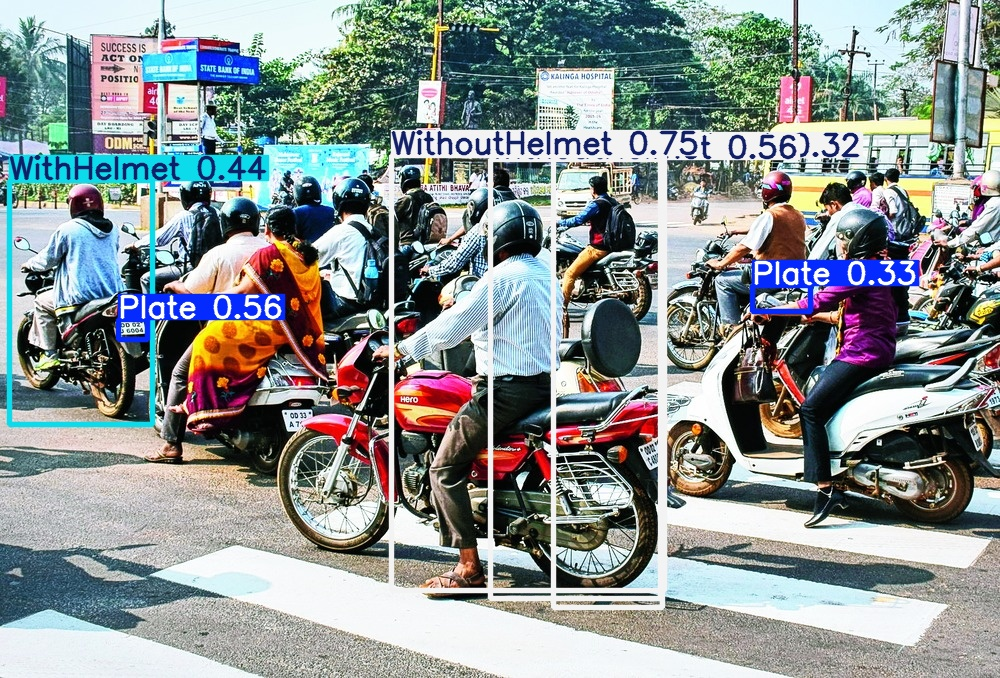

Vehicle Model Output:


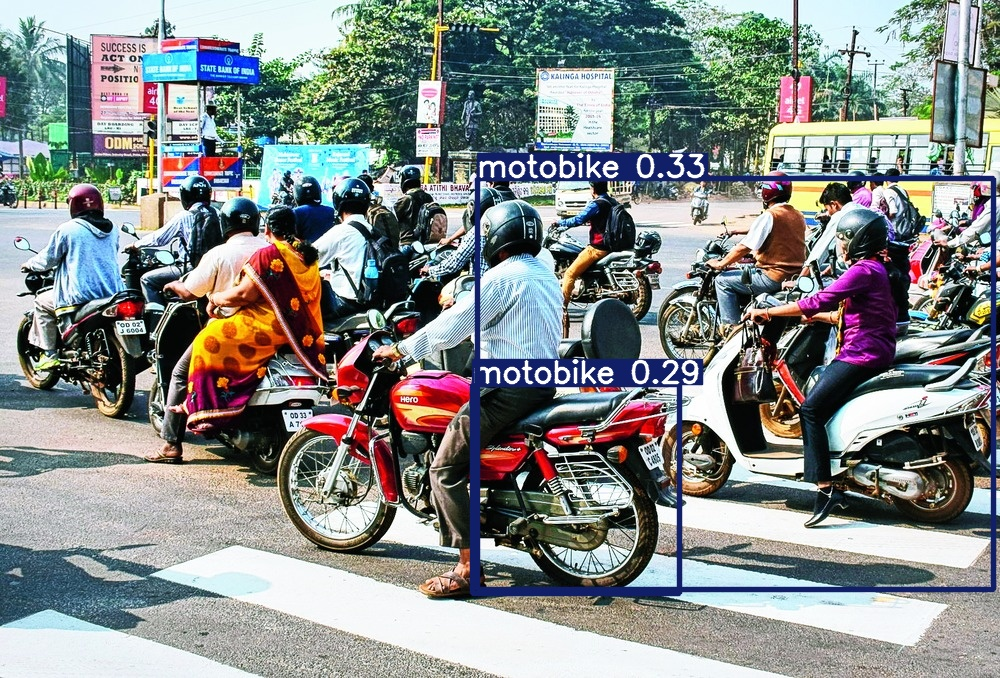


Helmet Model Output:


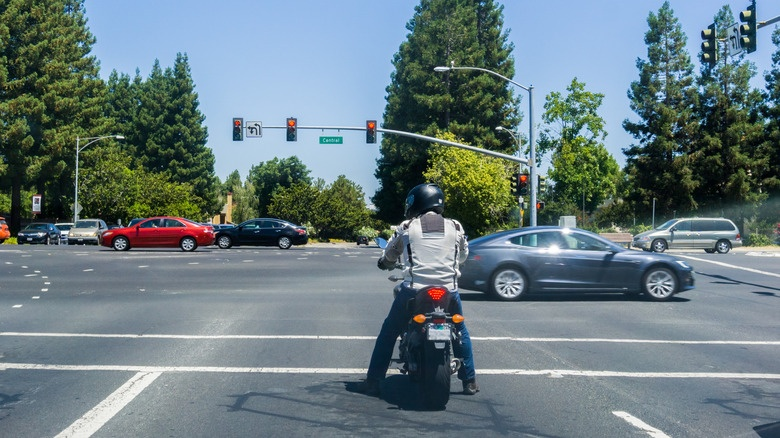

Vehicle Model Output:


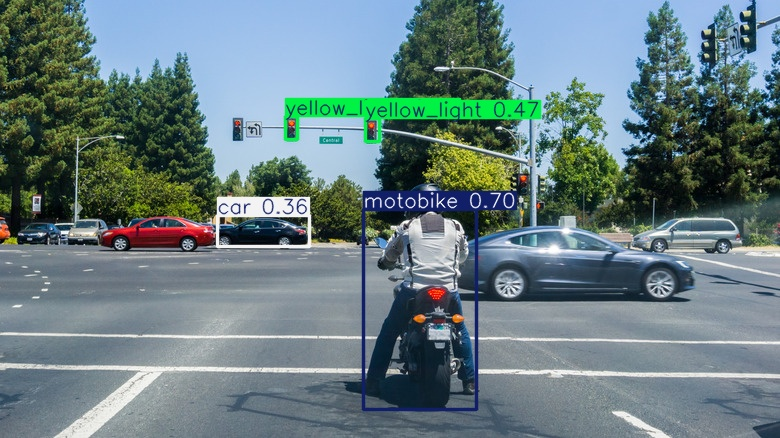


Helmet Model Output:


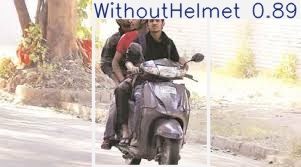

Vehicle Model Output:


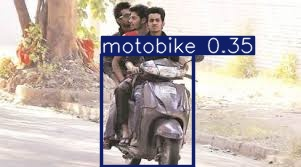


Helmet Model Output:


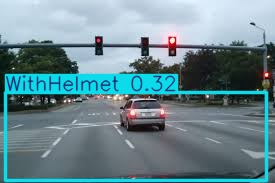

Vehicle Model Output:


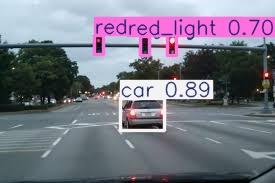


Helmet Model Output:


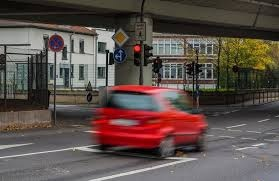

Vehicle Model Output:


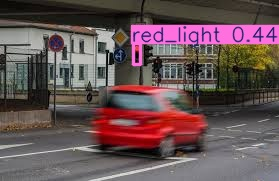

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import glob
import os

# Load models
model1 = YOLO("/content/helmet.pt")
model2 = YOLO("/content/vehicle.pt")

test_images_path = "/content/drive/MyDrive/test_images"
out_folder = "/content/drive/MyDrive/test_images/combine_results"

# Run inference
model1.predict(source=test_images_path, save=True, project=out_folder, name="helmet")
model2.predict(source=test_images_path, save=True, project=out_folder, name="vehicle")

# Display outputs
helmet_imgs = sorted(glob.glob(out_folder + "/helmet/*.jpg"))
vehicle_imgs = sorted(glob.glob(out_folder + "/vehicle/*.jpg"))

print("\nDisplaying combined results:")

for h, v in zip(helmet_imgs, vehicle_imgs):
    print("\nHelmet Model Output:")
    display(Image(filename=h))

    print("Vehicle Model Output:")
    display(Image(filename=v))


In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/Red Light Violation.v3i.yolov8/redlight_violation_yolov8/weights/best.pt')   # your trained model
metrics = model.val()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.2 ms, read: 0.2±0.1 MB/s, size: 62.8 KB)
val: Scanning /content/drive/MyDrive/Red Light Violation.v3i.yolov8/valid/labels.cache... 655 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 655/655 482.7Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 41/41 6.3s/it 4:18
                   all        655       3225      0.812       0.83       0.87       0.64
                  bike         41         86      0.798   

In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO('/content/drive/MyDrive/Red Light Violation.v3i.yolov8/redlight_violation_yolov8/weights/best.pt')

# Validate to get metrics
metrics = model.val()

# Extract accuracy metrics
precision = metrics.box.mp * 100
recall = metrics.box.mr * 100
map50 = metrics.box.map50 * 100
map5095 = metrics.box.map * 100

# Print accuracy in percentage
print("\nMODEL ACCURACY:")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"mAP50: {map50:.2f}%")
print(f"mAP50-95: {map5095:.2f}%")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.1±0.0 MB/s, size: 48.0 KB)
val: Scanning /content/drive/MyDrive/Red Light Violation.v3i.yolov8/valid/labels.cache... 655 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 655/655 528.6Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 41/41 2.0it/s 20.5s
                   all        655       3225      0.812       0.83       0.87       0.64
                  bike         41         86      0.798     

In [ ]:
import os
import glob
from collections import defaultdict
import yaml

# ---- Load classes from data.yaml ----
yaml_path = "/content/drive/MyDrive/Red Light Violation.v3i.yolov8/data.yaml"

with open(yaml_path, 'r') as f:
    data = yaml.safe_load(f)

class_names = data["names"]
num_classes = data["nc"]

print("Classes:", class_names)

# ---- Paths ----
label_dir = "/content/drive/MyDrive/Red Light Violation.v3i.yolov8/train/labels"

# ---- Dictionary: class_id -> number of images ----
class_image_count = defaultdict(int)

# ---- Go through each label file ----
for label_file in glob.glob(label_dir + "/*.txt"):
    with open(label_file, "r") as f:
        classes_in_image = set()  # avoid counting same class twice in one image

        for line in f:
            cls_id = int(line.split()[0])
            classes_in_image.add(cls_id)

        for cls in classes_in_image:
            class_image_count[cls] += 1

# ---- Print result ----
print("\n--- Number of Images in Each Class ---")
for cls_id in range(num_classes):
    print(f"{cls_id} ({class_names[cls_id]}): {class_image_count.get(cls_id, 0)} images")



Classes: ['bike', 'bus', 'car', 'green_light', 'motobike', 'red_light', 'stop_line', 'truck', 'yellow_light']

--- Number of Images in Each Class ---
0 (bike): 136 images
1 (bus): 230 images
2 (car): 1102 images
3 (green_light): 596 images
4 (motobike): 1055 images
5 (red_light): 826 images
6 (stop_line): 1204 images
7 (truck): 352 images
8 (yellow_light): 538 images


In [ ]:
from ultralytics import YOLO

model = YOLO('/content/drive/MyDrive/Red Light Violation.v3i.yolov8/redlight_violation_yolov8/weights/best.pt')

results = model.val(save_json=True)  # save predictions for metrics


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.1 ms, read: 0.1±0.1 MB/s, size: 41.7 KB)
val: Scanning /content/drive/MyDrive/Red Light Violation.v3i.yolov8/valid/labels.cache... 655 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 655/655 703.3Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 41/41 1.9it/s 21.1s
                   all        655       3225      0.812       0.83       0.87       0.64
                  bike         41         86      0.798      0.814      0.817      0.559
                   bus         68         84      0.875      0.869      0.929      0.814
                   car        332        713      0.782      0.855      0.902      0.761
           green_light        165        314      0.758      0.841      0.857      0.516
              m

In [ ]:
import os
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Paths
val_images_path = "/content/drive/MyDrive/Red Light Violation.v3i.yolov8/valid/images"
val_labels_path = "/content/drive/MyDrive/Red Light Violation.v3i.yolov8/valid/labels"
model_path = "/content/drive/MyDrive/Red Light Violation.v3i.yolov8/redlight_violation_yolov8/weights/best.pt"

model = YOLO(model_path)

# Class names
class_names = model.names
num_classes = len(class_names)

# Store all predictions & GT
all_scores = [[] for _ in range(num_classes)]
all_trues = [[] for _ in range(num_classes)]

# Loop through all images in val set
for img_file in os.listdir(val_images_path):
    if not img_file.lower().endswith(('.jpg', '.png', '.jpeg')):
        continue

    img_path = os.path.join(val_images_path, img_file)
    label_path = os.path.join(val_labels_path, img_file.replace('.jpg', '.txt').replace('.png', '.txt'))

    # Read ground truth classes
    gt_classes = set()
    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            for line in f:
                gt_classes.add(int(line.split()[0]))

    # Predict on image
    pred = model.predict(img_path, conf=0.001, verbose=False)[0]

    # For each class, collect scores & true/false labels
    for cls in range(num_classes):
        # Ground truth: 1 if class present, else 0
        y_true = 1 if cls in gt_classes else 0

        # Collect highest score predicted for this class
        class_scores = [b.conf.item() for b in pred.boxes if int(b.cls.item()) == cls]
        score = max(class_scores) if class_scores else 0.0  # No prediction for class → score 0

        all_scores[cls].append(score)
        all_trues[cls].append(y_true)


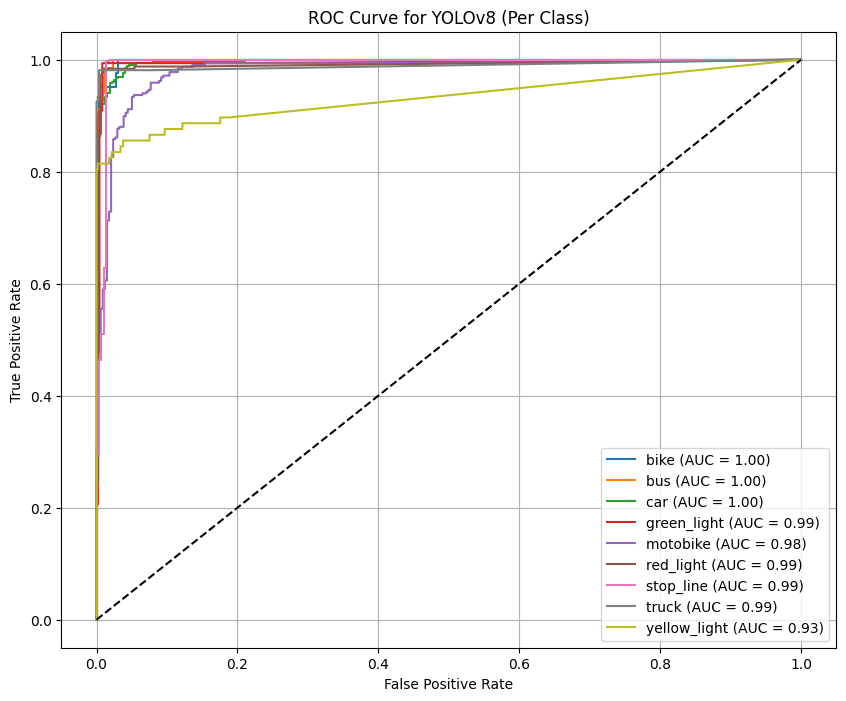

In [ ]:
plt.figure(figsize=(10, 8))

for cls in range(num_classes):
    y_true = np.array(all_trues[cls])
    y_score = np.array(all_scores[cls])

    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{class_names[cls]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for YOLOv8 (Per Class)")
plt.legend()
plt.grid()
plt.show()
